# Explore basins and states: all-to-all

In [125]:
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from tqdm import tqdm

sys.path.append("../code/")

import xgi
from kuramoto_hoi import *

sb.set_theme(style="ticks", context="notebook")

results_dir = "../results/"
data_dir = "../data/"

Path(results_dir).mkdir(parents=True, exist_ok=True)
Path(data_dir).mkdir(parents=True, exist_ok=True)

## Generate structure

In [2]:
N = 30

H = xgi.complete_hypergraph(N, max_order=2)

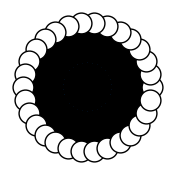

In [3]:
fig, ax = plt.subplots(figsize=(2, 2))
pos = xgi.circular_layout(H)

xgi.draw(H, pos=pos, ax=ax)

plt.show()

In [4]:
# may be used in the simulation function
links = H.edges.filterby("size", 2).members()
triangles = H.edges.filterby("size", 3).members()
adj1 = xgi.adjacency_matrix(H, order=1)
adj2 = xgi.adjacency_matrix(H, order=2)
k1_avg = H.nodes.degree(order=1).mean()
k2_avg = H.nodes.degree(order=2).mean()

## Dynamics

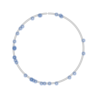

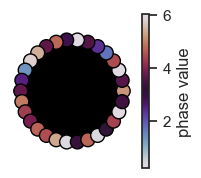

In [55]:
# Set parameters

# dynamical
k1 = 1  # pairwise coupling strength
k2 = 0  # triplet coupling strength
omega = 1 * np.ones(N)  # np.random.normal(size=N) #1 * np.ones(N)

ic = "random"  # initial condition type, see below
noise = 1e-1  # noise strength
p2 = None


psi_init = generate_state(N, kind=ic, q=2, noise=noise)

# integration
t_end = 200
dt = 0.01
times = np.arange(0, t_end + dt / 2, dt)

tag_params = f"k1_{k1}_k2_{k2}_ic_{ic}"

fig, ax = plt.subplots(figsize=(1, 1))
plot_phases(psi_init, it=None, ax=ax)
plt.show()

# only to viz twisted states
fig, ax = plt.subplots(figsize=(2, 2))
ax, im = xgi.draw(
    H, pos=pos, node_fc=psi_init % (2 * np.pi), node_fc_cmap="twilight", node_size=1
)
plt.colorbar(im, label="phase value")

In [42]:
def rhs_pairwise_triplet_all_sym(t, psi, omega, k1, k2):
    out = (
        rhs_pairwise_all(t, psi, omega, k1, k2)
        + rhs_triplet_all_sym(t, psi, omega, k1, k2)
        - omega
    )

    return out


def rhs_pairwise_triplet_all_asym(t, psi, omega, k1, k2):
    out = (
        rhs_pairwise_all(t, psi, omega, k1, k2)
        + rhs_triplet_all_asym(t, psi, omega, k1, k2)
        - omega
    )

    return out

In [58]:
n_reps = 100

# simulate
# kwargs = {
#    "links": links,
#    "triangles": triangles,
#    "k1_avg": k1_avg,
#    "k2_avg": k2_avg,
# }

thetas_arr = np.zeros((n_reps, N, len(times)))

for i in tqdm(range(n_reps)):
    psi_init = generate_state(N, kind="random", noise=noise)

    thetas, times = simulate_kuramoto(
        H,
        k1,
        k2,
        omega=omega,
        theta_0=psi_init,
        t_end=t_end,
        dt=dt,
        rhs=rhs_pairwise_all, # rhs_pairwise_all
        # **kwargs
    )

    thetas_arr[i] = thetas

100%|█████████████████████████████████████████| 100/100 [00:20<00:00,  4.91it/s]


Text(0.5, 0.98, 'k1_1_k2_0_ic_random')

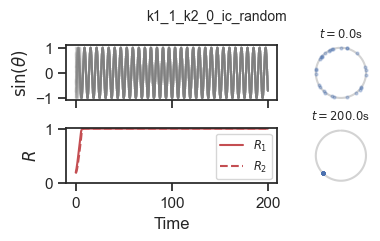

In [65]:
# plot the last repetition
i = 2
fig, axs = plot_sync(thetas_arr[i], times)

axs[0, 1].set_title(f"$t={times[0]}$s", fontsize="x-small")
axs[1, 1].set_title(f"$t={times[-1]}$s", fontsize="x-small")

axs[0, 0].set_xlabel("")
axs[1, 0].legend(loc="best", fontsize="x-small")

plt.subplots_adjust(hspace=0.5, top=0.8)

fig.suptitle(tag_params, fontsize="small")

In [60]:
states = [identify_state(thetas, atol=0.5) for thetas in thetas_arr]
set(states)

{'sync'}

In [63]:
states_unique, counts = np.unique(states, return_counts=True)
states_unique, counts

(array(['sync'], dtype='<U4'), array([100]))

In [62]:
states

['sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync',
 'sync']

In [ ]:
plt.hist(states)

## Loop over k2

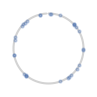

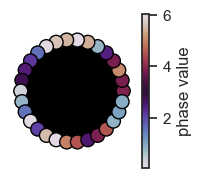

In [142]:
# Set parameters

# dynamical
k1 = 1  # pairwise coupling strength
k2 = 0  # triplet coupling strength
omega = 1 * np.ones(N)  # np.random.normal(size=N) #1 * np.ones(N)

ic = "random"  # initial condition type, see below
noise = 1e-1  # noise strength
p2 = None


psi_init = generate_state(N, kind=ic, q=2, noise=noise)

# integration
t_end = 200
dt = 0.01
times = np.arange(0, t_end + dt / 2, dt)

tag_params = f"k1_{k1}_k2_{k2}_ic_{ic}"

fig, ax = plt.subplots(figsize=(1, 1))
plot_phases(psi_init, it=None, ax=ax)
plt.show()

# only to viz twisted states
fig, ax = plt.subplots(figsize=(2, 2))
ax, im = xgi.draw(
    H, pos=pos, node_fc=psi_init % (2 * np.pi), node_fc_cmap="twilight", node_size=1
)
plt.colorbar(im, label="phase value")

In [171]:
n_reps = 100

k2s = [0, 0.5, 1, 1.5, 2, 2.5]

# simulate
# kwargs = {
#    "links": links,
#    "triangles": triangles,
#    "k1_avg": k1_avg,
#    "k2_avg": k2_avg,
# }

thetas_arr = np.zeros((n_reps, len(k2s), N, len(times)))

for j, k2 in enumerate (k2s):
    
    for i in tqdm(range(n_reps)):
        psi_init = generate_state(N, kind="random", noise=noise)

        thetas, times = simulate_kuramoto(
            H,
            k1,
            k2,
            omega=omega,
            theta_0=psi_init,
            t_end=t_end,
            dt=dt,
            rhs=rhs_pairwise_triplet_all_asym, # rhs_pairwise_all  #rhs_triplet_all_asym
            # **kwargs
        )

        thetas_arr[i, j] = thetas

100%|█████████████████████████████████████████| 100/100 [01:08<00:00,  1.45it/s]


In [172]:
results = {}

for j, k2 in enumerate(tqdm(k2s)): 
    states = [identify_state(thetas, atol=0.5) for thetas in thetas_arr[:,j]]
    states_unique, counts = np.unique(states, return_counts=True)
    probs = counts / n_reps
    
    results[k2] = {}
    for state, prob in zip(states_unique, probs):
        results[k2][state] = prob

100%|█████████████████████████████████████████████| 6/6 [00:22<00:00,  3.74s/it]


In [173]:
results

{0: {'sync': 1.0},
 0.5: {'sync': 1.0},
 1: {'sync': 1.0},
 1.5: {'sync': 1.0},
 2: {'sync': 1.0},
 2.5: {'sync': 1.0}}

In [174]:
import pandas as pd

In [175]:
df = pd.DataFrame.from_dict(results, orient="index").reset_index(names="k2")
df

,k2,sync
0,0.0,1.0
1,0.5,1.0
2,1.0,1.0
3,1.5,1.0
4,2.0,1.0
5,2.5,1.0


In [176]:
df_long = df.melt(id_vars="k2", var_name="state", value_name="proba")
df_long

,k2,state,proba
0,0.0,sync,1.0
1,0.5,sync,1.0
2,1.0,sync,1.0
3,1.5,sync,1.0
4,2.0,sync,1.0
5,2.5,sync,1.0


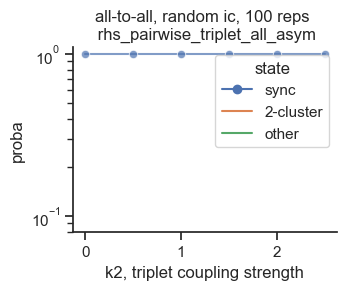

In [178]:
fig, ax = plt.subplots(figsize=(3.4, 2.4))
g = sb.lineplot(
    data=df_long,
    x="k2",
    y="proba",
    hue="state",
    markers=True,
    ax=ax,
    alpha=0.7,
    style="state",
    hue_order=["sync", "2-cluster", "other"]
)

g.set(yscale="log")

ax.set_xlabel("k2, triplet coupling strength")

title = f"all-to-all, {ic} ic, {n_reps} reps \n rhs_pairwise_triplet_all_asym"
ax.set_title(title)


sb.despine()
ax.set_ylim(ymax=1.1)

fig_name = f"basin_size_a2a_ic_{ic}_nreps_{n_reps}_rhs_pairwise_triplet_all_asym"

plt.savefig(f"{results_dir}{fig_name}.png", dpi=300, bbox_inches="tight")

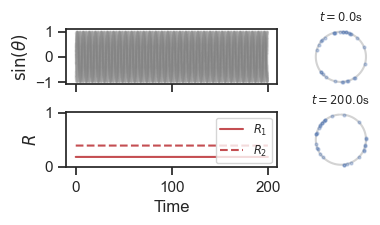

In [151]:
# plot the last repetition
i = 2
j = 0
fig, axs = plot_sync(thetas_arr[i, j], times)

axs[0, 1].set_title(f"$t={times[0]}$s", fontsize="x-small")
axs[1, 1].set_title(f"$t={times[-1]}$s", fontsize="x-small")

axs[0, 0].set_xlabel("")
axs[1, 0].legend(loc="best", fontsize="x-small")

plt.subplots_adjust(hspace=0.5, top=0.8)

#fig.suptitle(tag_params, fontsize="small")